<a href="https://colab.research.google.com/github/Priyanka2508/Coppersteel_Modelling/blob/main/Project5_Coppersteel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Copper_Set.xlsx')

In [7]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


Lets drop the columns which are not going to contribue for the model

In [4]:
data = df.drop(['id','item_date','delivery date','material_ref'],axis =1,inplace = True)
data = df
data.shape

(181673, 10)

In [5]:
data.status.value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

Drop columns which has status other than Won or Lost

In [5]:
data = pd.DataFrame(data)

In [6]:
# Dropping status otehr than Won or Lost since thats what is required
data_new =data[data['status'].isin(['Won', 'Lost'])]
data_new.shape

(150448, 10)

In [ ]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,150447.0,3.027510e+07,9.455083e+06,12458.00,30196886.00,30205312.0,3.027982e+07,2.147484e+09
country,150444.0,4.539109e+01,2.448819e+01,25.00,26.00,30.0,7.800000e+01,1.130000e+02
application,150445.0,2.519511e+01,1.764029e+01,2.00,10.00,15.0,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,0.18,0.74,1.5,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.00,1176.00,1250.0,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,611728.00,628377.00,640665.0,1.332077e+09,1.722208e+09
selling_price,150447.0,8.257639e+02,2.908797e+02,-1160.00,671.00,811.0,9.510000e+02,8.123614e+04


In [7]:
# Data type conversion
data_new['quantity tons'] = pd.to_numeric(data_new['quantity tons'],errors = 'coerce')
data_new['customer'] = pd.to_numeric(data_new['customer'],errors = 'coerce')
data_new['country'] = pd.to_numeric(data_new['country'],errors = 'coerce')
data_new['application'] = pd.to_numeric(data_new['application'],errors = 'coerce')
data_new['thickness'] = pd.to_numeric(data_new['thickness'],errors = 'coerce')
data_new['width'] = pd.to_numeric(data_new['width'],errors = 'coerce')
data_new['product_ref'] = pd.to_numeric(data_new['product_ref'],errors = 'coerce')
data_new['selling_price'] = pd.to_numeric(data_new['selling_price'],errors = 'coerce')

data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150448 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150447 non-null  float64
 1   customer       150447 non-null  float64
 2   country        150444 non-null  float64
 3   status         150448 non-null  object 
 4   item type      150448 non-null  object 
 5   application    150445 non-null  float64
 6   thickness      150448 non-null  float64
 7   width          150448 non-null  float64
 8   product_ref    150448 non-null  int64  
 9   selling_price  150447 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.6+ MB


<ipython-input-7-0a3015b38c9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['quantity tons'] = pd.to_numeric(data_new['quantity tons'],errors = 'coerce')
<ipython-input-7-0a3015b38c9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['customer'] = pd.to_numeric(data_new['customer'],errors = 'coerce')
<ipython-input-7-0a3015b38c9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [9]:
data_new['selling_price'] = data_new['selling_price'].apply(lambda x: np.nan if x <= 0 else x )
data_new['quantity tons'] = data_new['quantity tons'].apply(lambda x: np.nan if x <= 0 else x )
data_new

<ipython-input-9-bdb4f0ab5398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['selling_price'] = data_new['selling_price'].apply(lambda x: np.nan if x <= 0 else x )
<ipython-input-9-bdb4f0ab5398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['quantity tons'] = data_new['quantity tons'].apply(lambda x: np.nan if x <= 0 else x )


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00
181671,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00


In [14]:
data_new.isna().sum()

quantity tons    4
customer         1
country          4
status           0
item type        0
application      3
thickness        0
width            0
product_ref      0
selling_price    6
dtype: int64

In [10]:
data_new = data_new.dropna()
data_new.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [ ]:
data_new.shape

(150433, 10)

In [16]:
data_copy = data_new
data_new.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [ ]:
!pip install seaborn
!pip install matplotlib

<Axes: >

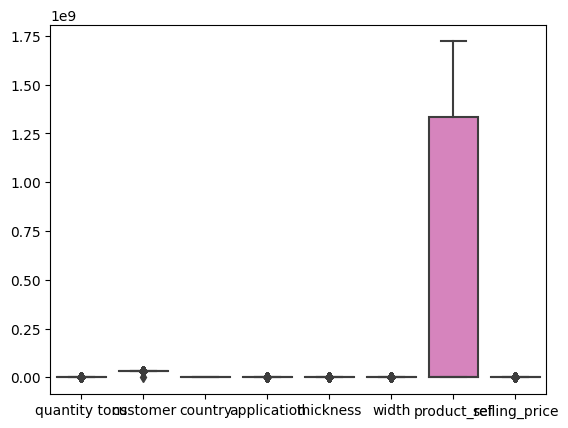

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = data_new)

<ipython-input-13-f41a27c08620>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['quantity tons'])


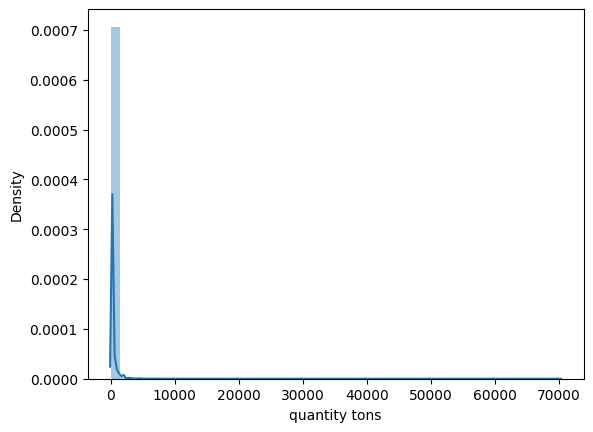

<ipython-input-13-f41a27c08620>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['country'])


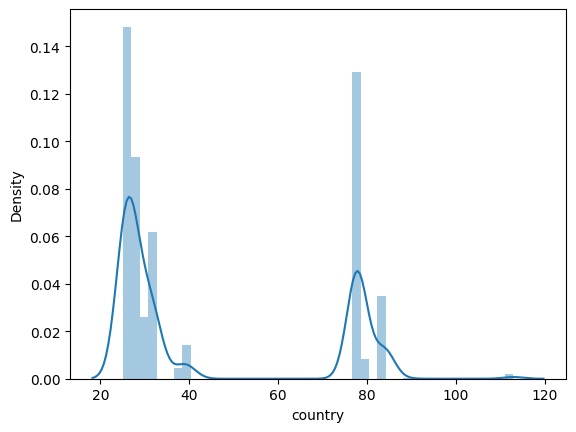

<ipython-input-13-f41a27c08620>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['application'])


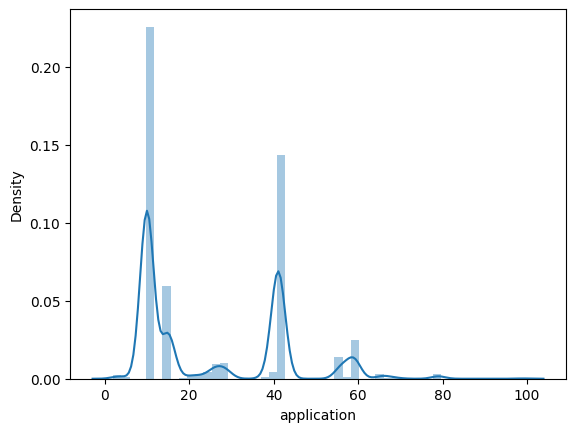

<ipython-input-13-f41a27c08620>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['thickness'])


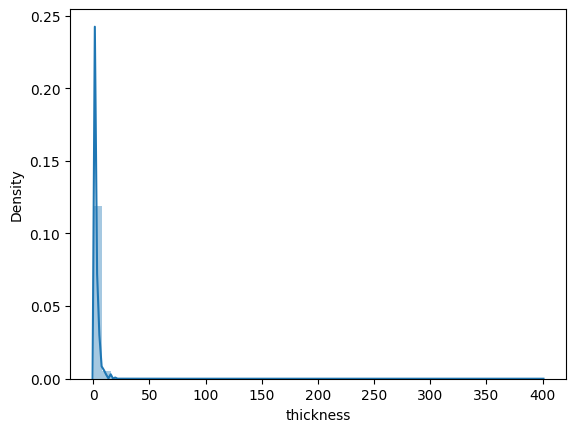

<ipython-input-13-f41a27c08620>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['width'])


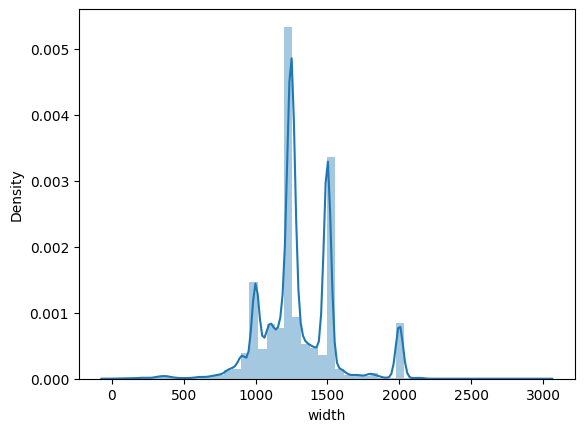

<ipython-input-13-f41a27c08620>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['selling_price'])


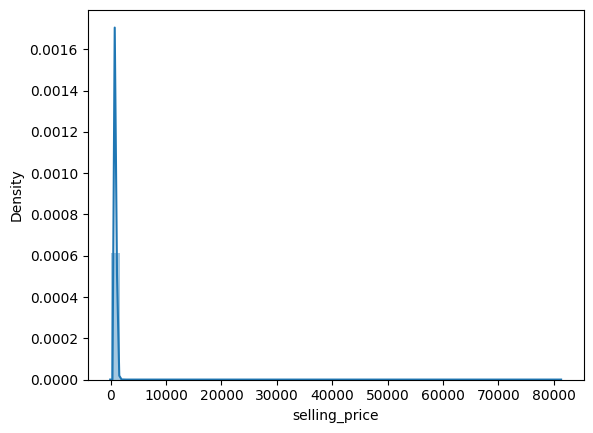

In [13]:
sns.distplot(data_new['quantity tons'])
plt.show()
sns.distplot(data_new['country'])
plt.show()
sns.distplot(data_new['application'])
plt.show()
sns.distplot(data_new['thickness'])
plt.show()
sns.distplot(data_new['width'])
plt.show()
sns.distplot(data_new['selling_price'])
plt.show()

In [12]:
# Check distribution
def plot(data_new, column):
  plt.figure(figsize =(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data = data_new, x= column)
  plt.title(f'Box Plot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data = data_new, x= column, kde = True, bins = 50)
  plt.title(f'Distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data = data_new, x= column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150433 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150433 non-null  float64
 1   customer       150433 non-null  float64
 2   country        150433 non-null  float64
 3   status         150433 non-null  object 
 4   item type      150433 non-null  object 
 5   application    150433 non-null  float64
 6   thickness      150433 non-null  float64
 7   width          150433 non-null  float64
 8   product_ref    150433 non-null  int64  
 9   selling_price  150433 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.6+ MB


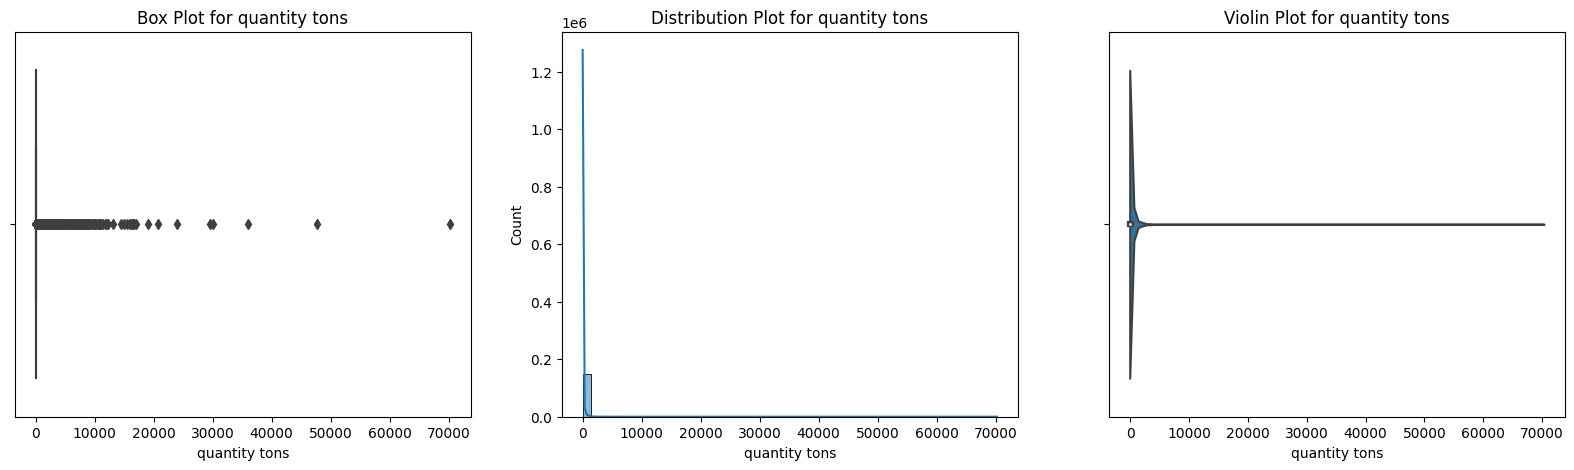

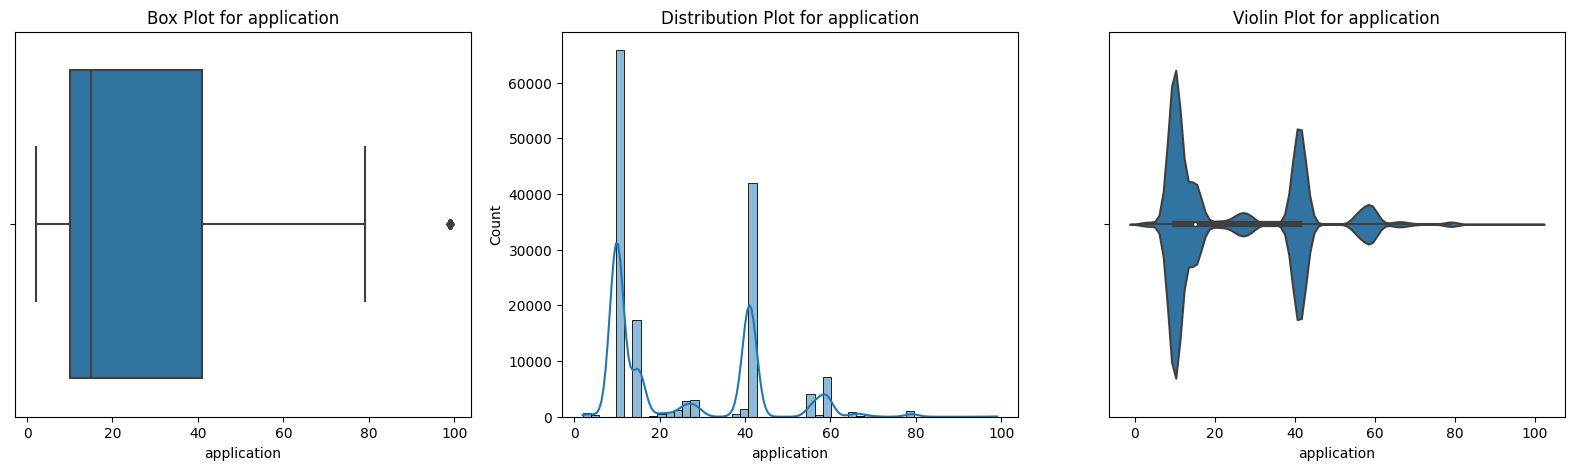

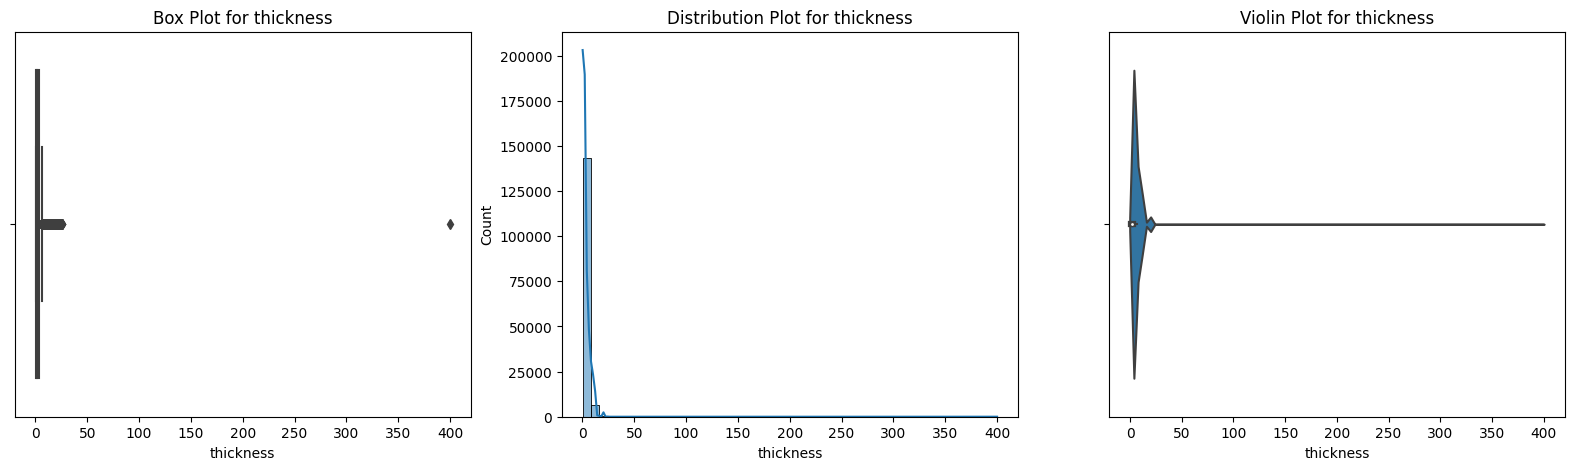

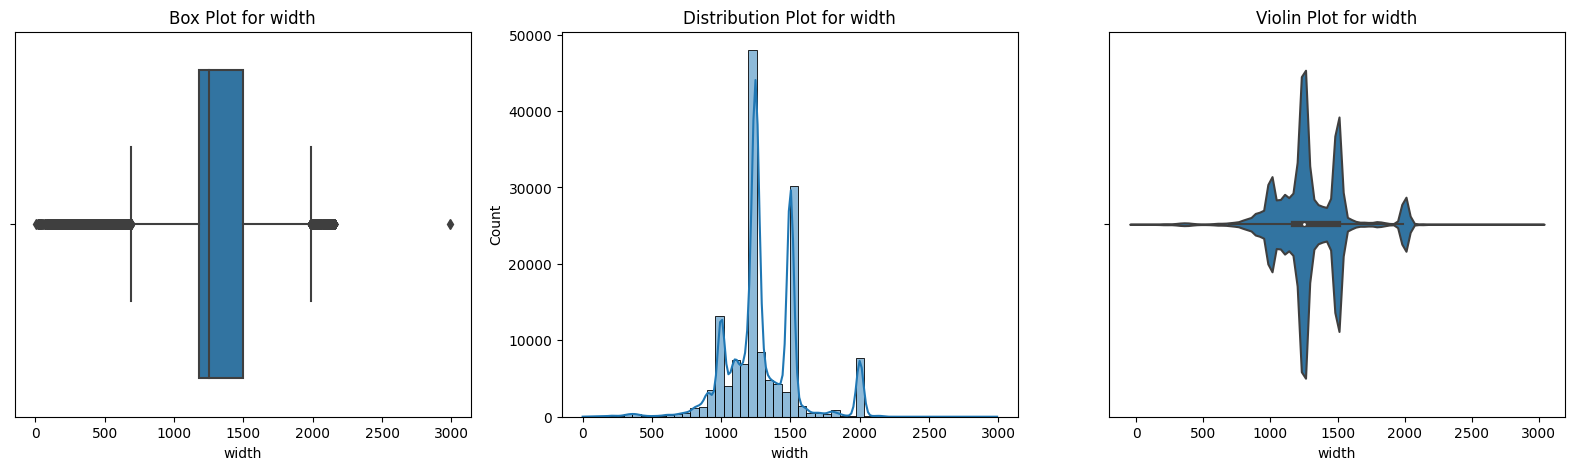

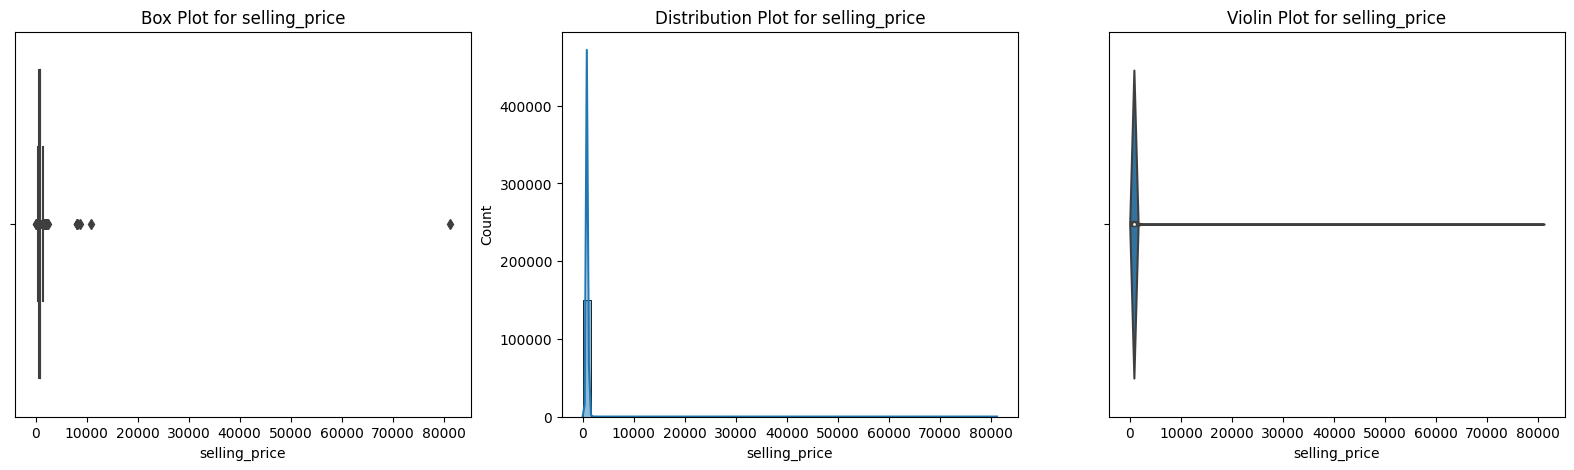

In [13]:
for i in ['quantity tons','application','thickness','width','selling_price']:
  plot(data_new,i)

<ipython-input-14-f18f28662871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['quantity tons'] = pd.to_numeric(data_new['quantity tons'], errors='coerce')
<ipython-input-14-f18f28662871>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['selling_price'] = pd.to_numeric(data_new['selling_price'], errors='coerce')
<ipython-input-14-f18f28662871>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

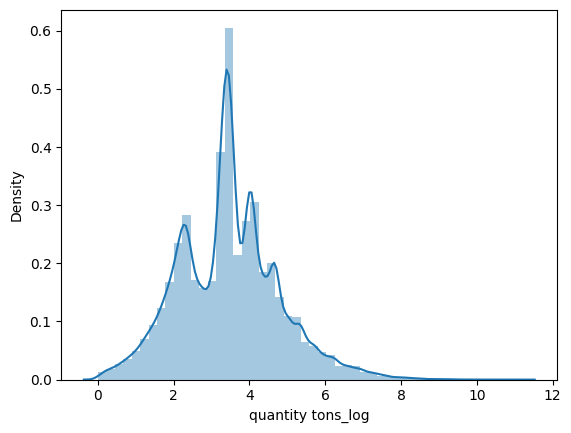

<ipython-input-14-f18f28662871>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['selling_price_log'])


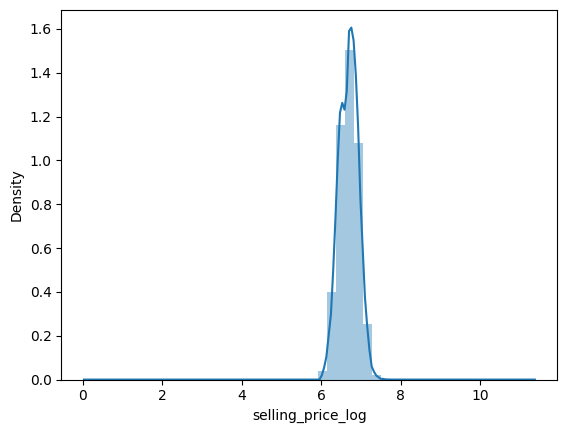

<ipython-input-14-f18f28662871>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['thickness_log'])


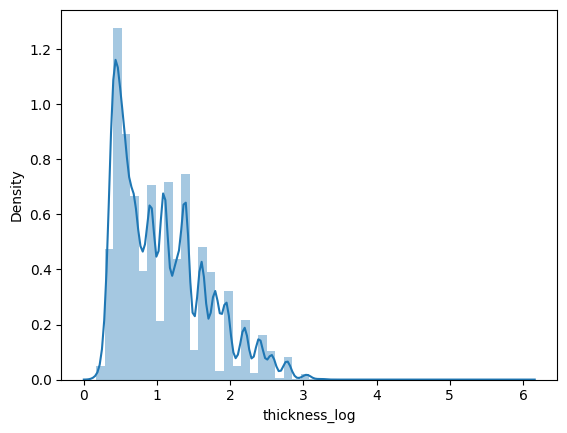

In [14]:
# Quantity tons, thickness, selling_price is skewed
#Log  transformation
data_new['quantity tons'] = pd.to_numeric(data_new['quantity tons'], errors='coerce')
data_new['selling_price'] = pd.to_numeric(data_new['selling_price'], errors='coerce')
data_new['thickness'] = pd.to_numeric(data_new['thickness'], errors='coerce')

data_new['quantity tons_log'] = np.log1p(data_new['quantity tons'])
data_new['selling_price_log'] = np.log1p(data_new['selling_price'])
data_new['thickness_log'] = np.log1p(data_new['thickness'])

sns.distplot(data_new['quantity tons_log'])
plt.show()
sns.distplot(data_new['selling_price_log'])
plt.show()
sns.distplot(data_new['thickness_log'])
plt.show()

In [15]:
#Check outliers

def outlier(data_new,column):
  IQR = data_new[column].quantile(0.75) - data_new[column].quantile(0.25)
  upper = data_new[column].quantile(0.75) + (1.5*IQR)
  lower = data_new[column].quantile(0.75) - (1.5*IQR)
  data_new[column] = data_new[column].clip(lower, upper)



In [16]:
outlier(data_new, 'quantity tons_log')
outlier(data_new, 'selling_price_log')
outlier(data_new, 'thickness_log')
outlier(data_new, 'width')

<ipython-input-15-1ef338347192>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[column] = data_new[column].clip(lower, upper)
<ipython-input-15-1ef338347192>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[column] = data_new[column].clip(lower, upper)
<ipython-input-15-1ef338347192>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

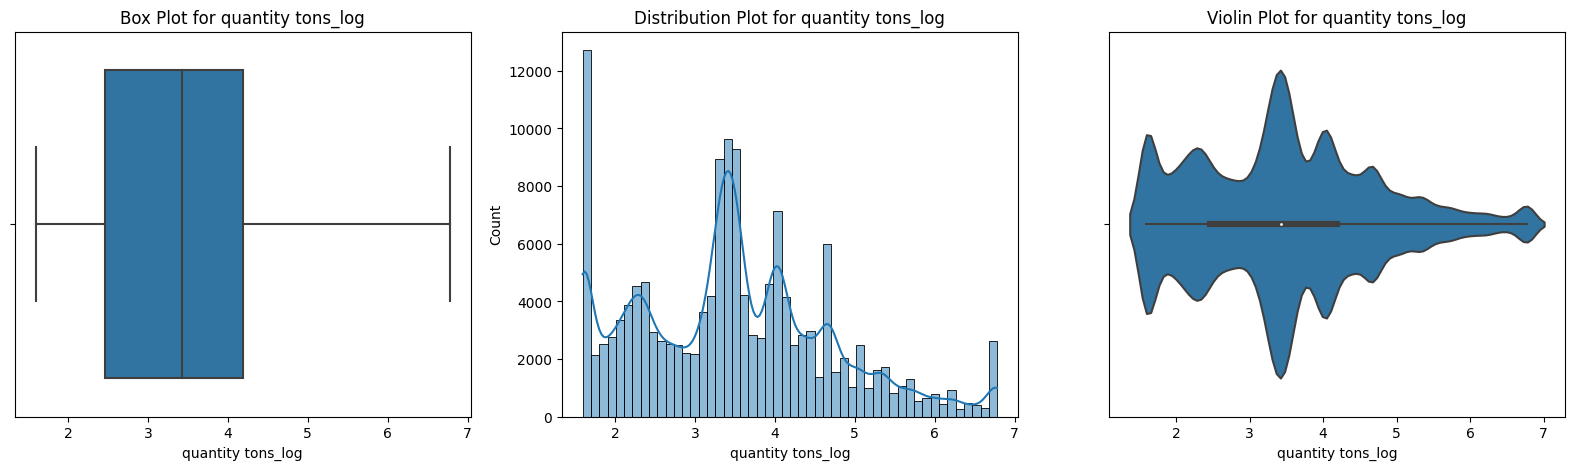

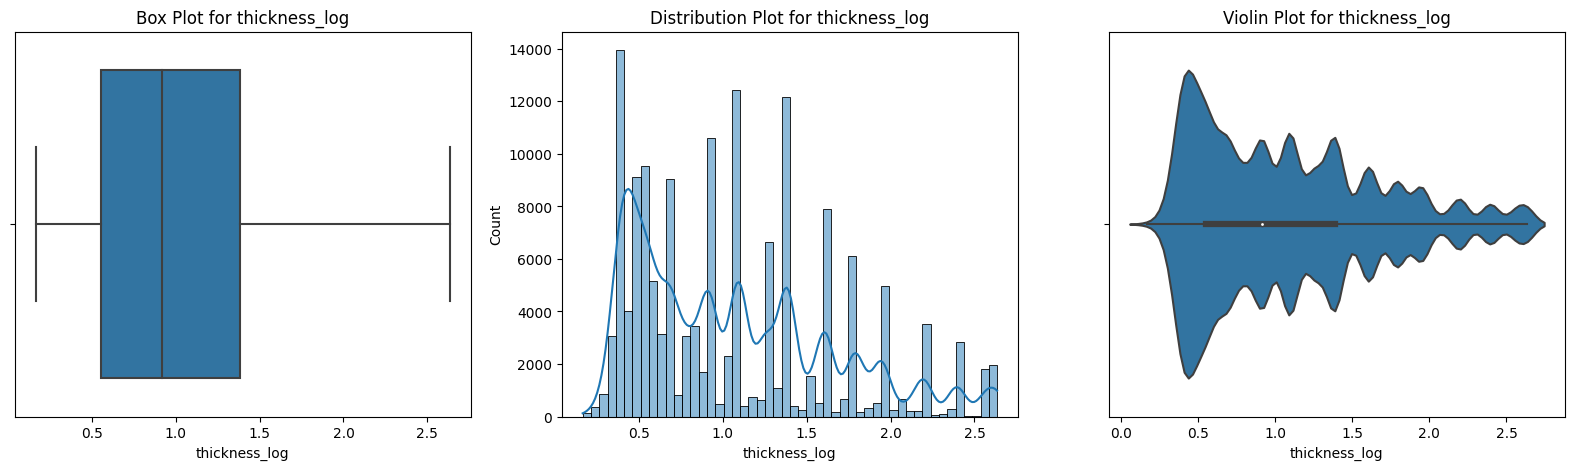

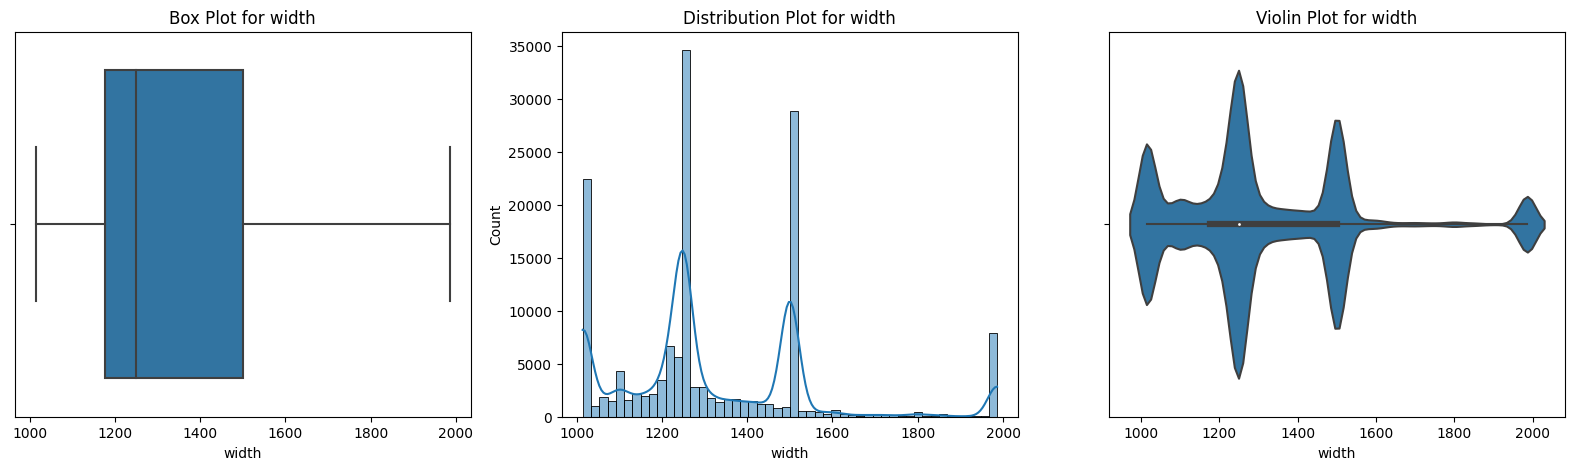

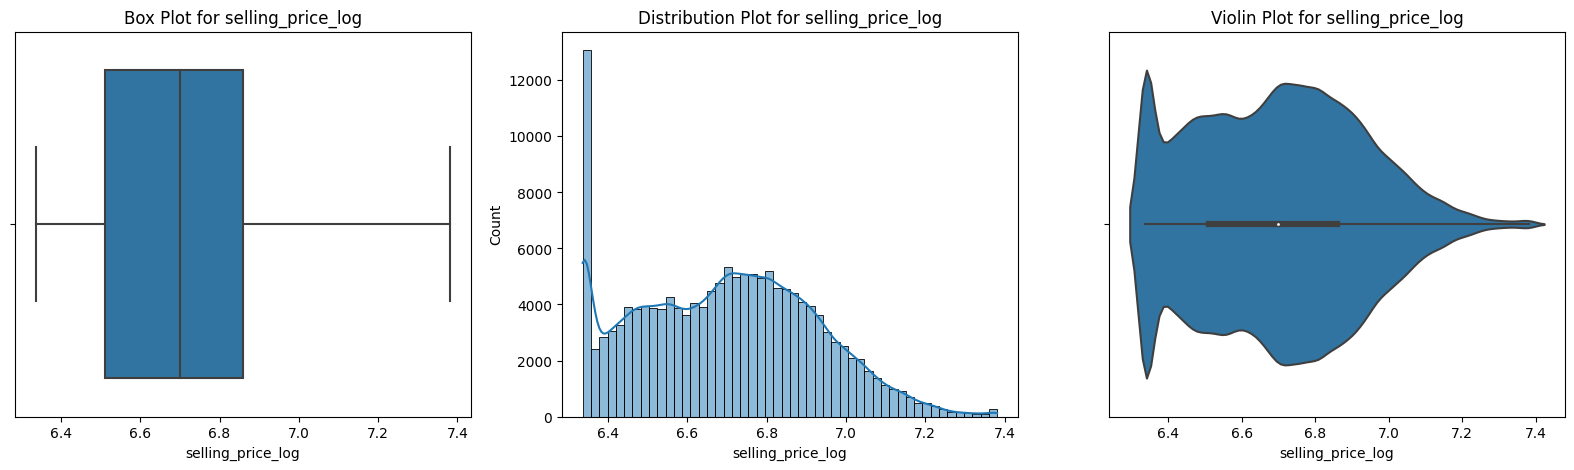

In [19]:
for i in ['quantity tons_log','thickness_log','width','selling_price_log']:
  plot(data_new,i)

In [17]:
copper_set = data_new.drop(columns =['quantity tons','selling_price','thickness'])
copper_set.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,150433.0,3.023289e+07,1.056117e+05,12458.000000,3.019689e+07,3.020531e+07,3.027982e+07,3.040818e+07
country,150433.0,4.539132e+01,2.448830e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150433.0,2.519478e+01,1.764052e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
width,150433.0,1.311733e+03,2.351634e+02,1014.000000,1.176000e+03,1.250000e+03,1.500000e+03,1.986000e+03
product_ref,150433.0,4.748282e+08,7.172608e+08,611728.000000,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
quantity tons_log,150433.0,3.483819e+00,1.231708e+00,1.595468,2.459521e+00,3.431872e+00,4.187628e+00,6.779789e+00
selling_price_log,150433.0,6.694741e+00,2.261560e-01,6.336068,6.510258e+00,6.699500e+00,6.858639e+00,7.381209e+00
thickness_log,150433.0,1.068599e+00,5.945815e-01,0.165514,5.538851e-01,9.162907e-01,1.386294e+00,2.634908e+00


<Axes: >

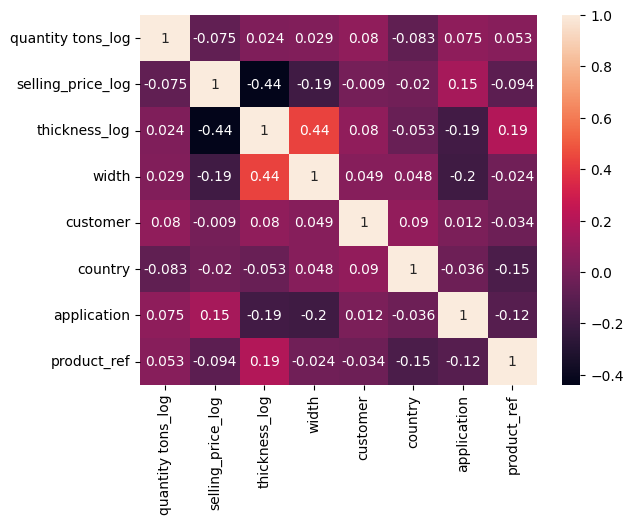

In [21]:
# Check ffor correlation
col = ['quantity tons_log','selling_price_log','thickness_log','width','customer','country','application','product_ref']
data_hm = copper_set[col].corr()
sns.heatmap(data_hm, annot = True)

In [ ]:
copper_set.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'selling_price_log',
       'thickness_log'],
      dtype='object')

In [ ]:
copper_set['item type'].value_counts()

W         91945
S         52461
PL         5032
WI          504
Others      463
IPL          27
SLAWR         1
Name: item type, dtype: int64

In [ ]:
copper_set['status'].value_counts()


Won     116000
Lost     34433
Name: status, dtype: int64

In [18]:
copper_p = copper_set
copper_c = copper_set

copper_copy = copper_set

Prediction of Selling Price

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = copper_p[['customer','country','status','item type','application','width','product_ref','quantity tons_log','thickness_log']].copy()
Y = copper_p[['selling_price_log']].copy()

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()


ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()

X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# decision tree
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 20}
Mean squared error: 0.02156570623515757
R-squared: 0.58069510661148


In [38]:
X_trf = pd.DataFrame(X)
X_trf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.427260,-0.861360,0.050478,0.800581,-0.710191,-0.725091,1.667419,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
1,2.566610,0.895964,-0.808659,-0.432608,-0.832699,-0.283567,1.664495,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
2,2.009359,0.159022,-1.255535,-1.266074,-0.628519,-0.747295,-0.661128,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,-1.253807,17.247556,-0.544827,0.544827
3,1.486891,1.916346,0.210777,0.022397,-0.546848,1.104882,1.664495,-0.013398,-0.055563,-0.186032,1.366573,-0.002578,-1.253807,-0.057979,-0.544827,0.544827
4,2.584879,-0.861360,0.909616,2.867236,-0.710191,-0.201928,-0.661111,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150428,0.971259,0.895964,-0.665436,-0.305036,-0.832699,-0.303300,-0.433159,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
150429,0.938198,0.895964,-0.665436,-0.390084,-0.832699,-0.303300,-0.433159,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
150430,1.509233,0.895964,-0.674039,0.800581,-0.832699,-0.303300,-0.433159,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827
150431,-1.484397,0.895964,-0.894928,-0.262513,-0.832699,-0.303300,-0.433159,-0.013398,-0.055563,-0.186032,-0.731758,-0.002578,0.797571,-0.057979,-0.544827,0.544827


In [20]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(35), 10, np.log(250), 0, 27,30203030,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [790.44130526]


In [22]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('en.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('en1.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

CLASSIFICATION

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer


X = copper_c[['customer','country','item type','application','width','product_ref','quantity tons_log','thickness_log','selling_price_log']].copy()
Y = copper_c[['status']].copy()

 # Balance the data

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1)



# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)


# independent features after encoding
X = np.concatenate((X[['quantity tons_log','selling_price_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)

# Balance only the target variable Y using SMOTE
X, Y = sm.fit_resample(X, y)

scaler = StandardScaler()
X = scaler.fit_transform(X)


# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9274281609195403
Confusion Matrix:
[[32384  2464]
 [ 2587 32165]]


In [42]:
X_tr = pd.DataFrame(X)
X_tr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.386385,0.290828,-0.778076,-0.059715,0.694406,-0.661312,-0.835695,1.569226,-0.010789,-0.047963,-0.151035,-0.902740,-0.002076,0.952422,-0.046660
1,2.669194,1.217527,1.053151,-0.889420,-0.493382,-0.786422,-0.348164,1.566381,-0.010789,-0.047963,-0.151035,-0.902740,-0.002076,0.952422,-0.046660
2,2.074576,-0.990101,0.285217,-1.320987,-1.296163,-0.577904,-0.860213,-0.696392,-0.010789,-0.047963,-0.151035,-0.902740,-0.002076,-1.061603,21.431693
3,1.517072,-0.191834,2.116444,0.095091,-0.055129,-0.494497,1.184961,1.566381,-0.010789,-0.047963,-0.151035,1.120635,-0.002076,-1.061603,-0.046660
4,2.688689,-1.491783,-0.778076,0.769989,2.684975,-0.661312,-0.258018,-0.696376,-0.010789,-0.047963,-0.151035,-0.902740,-0.002076,0.952422,-0.046660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231995,-1.248604,-1.306905,-0.482717,2.244414,0.694406,-0.744719,-0.399019,1.570671,-0.010789,-0.047963,-0.151035,1.120635,-0.002076,-1.061603,-0.046660
231996,0.148879,0.211225,-0.778076,-0.856114,0.847142,-0.744719,-0.388658,-0.474584,-0.010789,-0.047963,-0.151035,1.120635,-0.002076,-1.061603,-0.046660
231997,-0.059071,-0.615850,-0.482717,1.188609,0.694406,1.674092,0.587607,1.570671,-0.010789,-0.047963,-0.151035,1.120635,-0.002076,-1.061603,-0.046660
231998,0.620584,-0.412531,-0.778076,0.407550,-0.329549,-0.786422,-0.317980,1.566381,-0.010789,-0.047963,-0.151035,1.120635,-0.002076,-1.061603,-0.046660


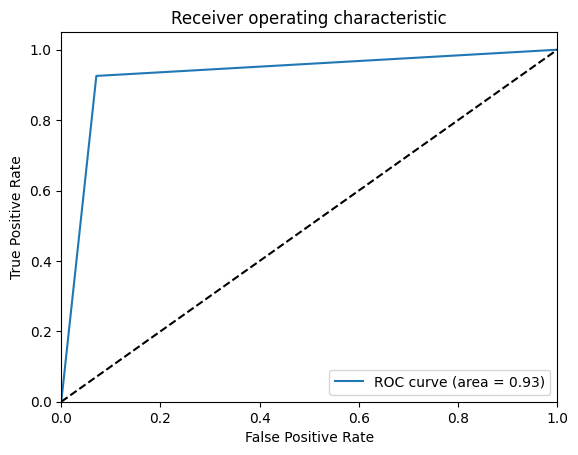

In [43]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('cencoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

